In [1]:
import numpy as np;
import pandas as pd;

from sklearn.compose import ColumnTransformer;
from sklearn.preprocessing import OneHotEncoder;

from sklearn.model_selection import train_test_split;

from sklearn.preprocessing import StandardScaler;

import statsmodels.api as sm;
import matplotlib.pyplot as plt;

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv("Fish.csv");

In [ ]:
print(dataset);

In [3]:
x = np.concatenate((dataset.iloc[:,2:].values,dataset.iloc[:,0].values.reshape(len(dataset.iloc[:,0]),1)),1);

In [11]:
y = dataset.iloc[:,1].values;

In [13]:
print(x.shape);

(159, 11)


In [ ]:
print(y);

In [8]:
#for encoding the categorical values
ct = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[-1])],remainder="passthrough");

In [9]:
x = ct.fit_transform(x);

In [12]:
'''
The model that will be used it doesn't solve the dummy variable problem so for that, will have to skip
the first column.
'''
x = x[:,1:];

#need the data to be of float64 to support the isfinite ufunc
x = x.astype("float64");

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1);

In [17]:
#feature scaling
Scaler = StandardScaler();
#since the first three values are the encoded values, so ignoring them
Scaler.fit(x_train[:,3:]);
x_train[:,3:] = Scaler.transform(x_train[:,3:]); 

In [18]:
x_test[:,3:] = Scaler.transform(x_test[:,3:]); 

In [21]:
print(x_test.shape);
print(x_train.shape);

(32, 11)
(127, 11)


In [20]:
'''
the method that I am about to use, for making the model doesn't take into account the constant term
in the equation of linear regression or the coefficient of x0 = 1, so will have to add a column of 1s at
the start.
'''
#x_train = np.append(np.ones((len(x_train),1)),x_train,1);
r,c = x_train.shape;
x_train1 = np.append(np.ones((r,1)),x_train,1)

In [22]:
print(x_train1.shape);

(127, 12)


In [ ]:
print(x_train);

In [30]:
def OLS_model_return(x,y):
    OLS_obj = sm.OLS(endog=y,exog=x);
    model = OLS_obj.fit()
    print(model.summary());
    return model

In [31]:
#eliminating the variables according to their p-score, SL = 0.05
model = OLS_model_return(x_train1,y_train);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     164.8
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           5.96e-65
Time:                        03:50:36   Log-Likelihood:                -746.31
No. Observations:                 127   AIC:                             1517.
Df Residuals:                     115   BIC:                             1551.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        422.0931     62.593      6.743      0.0

In [32]:
#maximum value is 0.9 and is at index 6 so removing it
x_temp = x_train1[:,[0,1,2,3,4,5,7,8,9,10]];
model = OLS_model_return(x_temp,y_train);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     202.4
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           5.64e-67
Time:                        03:50:50   Log-Likelihood:                -747.04
No. Observations:                 127   AIC:                             1514.
Df Residuals:                     117   BIC:                             1543.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        426.8185     28.470     14.992      0.0

In [33]:
#maximum value is 0.6 and is at index 9 so removing it
x_temp = x_train1[:,[0,1,2,3,4,6,7,8,9]];
model = OLS_model_return(x_temp,y_train);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.2
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           6.88e-65
Time:                        03:51:10   Log-Likelihood:                -755.20
No. Observations:                 127   AIC:                             1528.
Df Residuals:                     118   BIC:                             1554.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        567.1319     22.293     25.440      0.0

In [34]:
#maximum value is 0.6 and is at index 6 so removing it
x_temp = x_train1[:,[0,1,2,3,4,6,8,9]];
model = OLS_model_return(x_temp,y_train);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           4.99e-66
Time:                        03:51:21   Log-Likelihood:                -755.34
No. Observations:                 127   AIC:                             1527.
Df Residuals:                     119   BIC:                             1549.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        563.5491     21.129     26.671      0.0

In [37]:
#max p is less than sl, so this is the final model, and the values of columns remaining have importance on result
imp_indices = [0,1,2,3,4,6,8,9];
y_pred = model.predict(exog=x_test[:,imp_indices]);

In [38]:
merged = np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_pred),1)),axis=1);

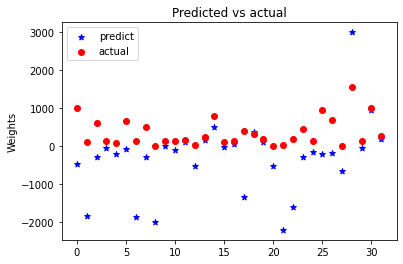

In [43]:
prc=0;
for i in range(0,len(merged)):
    if prc==0:
        plt.scatter(i,merged[i][0],color="blue",marker="*",label="predict");
        plt.scatter(i,merged[i][1],color="red",label="actual");
        prc=1;
    else:
        plt.scatter(i,merged[i][0],color="blue",marker="*");
        plt.scatter(i,merged[i][1],color="red");

plt.title("Predicted vs actual");
plt.ylabel("Weights");
plt.legend();
plt.show();